1 - MEASURE OF CENTRAL TENDENCY

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.DataFrame({'movie':['a','b','c','a','b','c','a','b','c'],
                  'rating':[9,7,6,9,5,7,8,9,5]})

In [6]:
df.rating.mean()

7.222222222222222

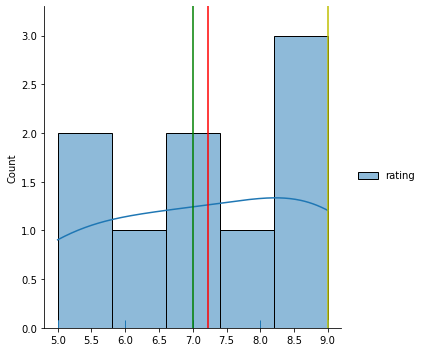

In [15]:
sns.displot(df, kde=True, rug=True)
plt.axvline(np.mean(df.rating), color='r', linestyle = '-')
plt.axvline(np.median(df.rating), color='g', linestyle = '-')
plt.axvline(df.rating.mode().values[0], color='y', linestyle = '-')

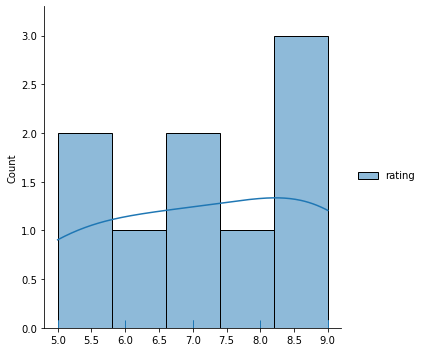

In [12]:
sns.displot(df, kde=True, rug=True)

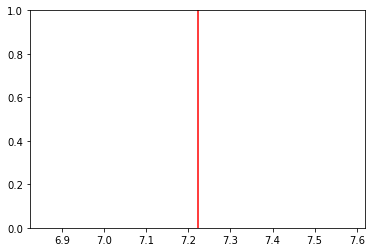

In [9]:
plt.axvline(np.mean(df.rating), color='r', linestyle = '-')

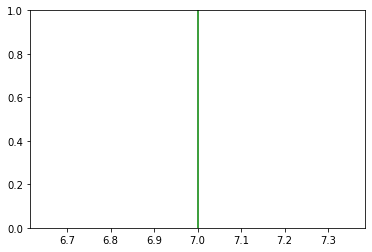

In [16]:
plt.axvline(np.median(df.rating), color='g', linestyle = '-')

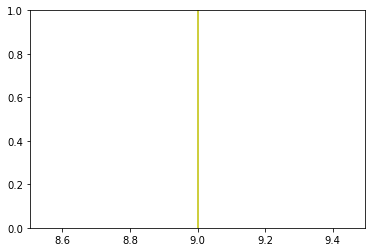

In [11]:
plt.axvline(df.rating.mode().values[0], color='y', linestyle = '-')

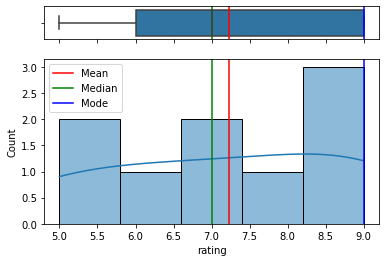

In [18]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw={'height_ratios':(0.2,1)})
mean = np.mean(df.rating)
median = np.median(df.rating)
mode = df.rating.mode().values[0]

sns.boxplot(data=df, x = 'rating', ax = ax_box)
ax_box.axvline(mean, color='r', linestyle='-')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x='rating', ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle = '-', label = 'Mean')
ax_hist.axvline(median, color='g', linestyle = '-', label = 'Median')
ax_hist.axvline(mode, color='b', linestyle = '-', label = 'Mode')

ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

In [19]:
#variance
df.rating.var()

2.6944444444444446

In [20]:
#Standard Deviation
df.rating.std()

1.6414763002993509

In [22]:
mean = df.groupby(['movie'])['rating'].mean()
std = df.groupby(['movie'])['rating'].std()

print(mean)

movie
a    8.666667
b    7.000000
c    6.000000
Name: rating, dtype: float64


In [23]:
print(std)

movie
a    0.57735
b    2.00000
c    1.00000
Name: rating, dtype: float64


<AxesSubplot:xlabel='movie'>

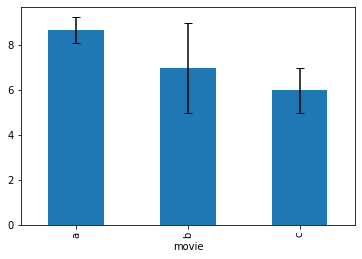

In [24]:
fig, ax = plt.subplots()
mean.plot.bar(yerr=std, ax=ax, capsize=4)

2 - MEASURE OF SPREAD.

In [35]:
df1 = pd.DataFrame({'pop_sample':range(20)})

In [36]:
print(df1)

    pop_sample
0            0
1            1
2            2
3            3
4            4
5            5
6            6
7            7
8            8
9            9
10          10
11          11
12          12
13          13
14          14
15          15
16          16
17          17
18          18
19          19


In [52]:
df1.sample(5).mean()

pop_sample    11.2
dtype: float64

In [55]:
df1.sample(10).mean()

pop_sample    10.3
dtype: float64

In [56]:
df1.sample(15).mean()

pop_sample    9.6
dtype: float64

In [48]:
df1.mean()

pop_sample    9.5
dtype: float64

In [57]:
from scipy import stats
stats.sem(df1)

array([1.32287566])

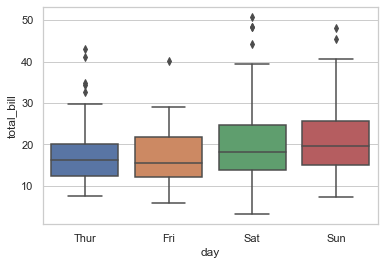

In [59]:
df2 = sns.load_dataset('tips')
sns.set_theme(style='whitegrid')
ax = sns.boxplot(x='day', y='total_bill', data=df2)

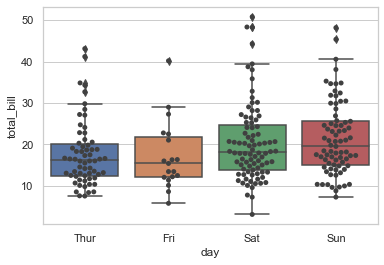

In [60]:
ax = sns.boxplot(x='day', y='total_bill', data=df2)
ax = sns.swarmplot(x='day', y='total_bill', data=df2, color='0.25')

In [62]:
print(df2['total_bill'].quantile([0.05,0.25,0.5,0.75]))

0.05     9.5575
0.25    13.3475
0.50    17.7950
0.75    24.1275
Name: total_bill, dtype: float64


In [63]:
print(df2['total_bill'].quantile(0.75) - df2['total_bill'].quantile(0.25)) 

10.779999999999998


3 - CORRELATION AND COVARIANCE

In [65]:
df3 = sns.load_dataset('iris')

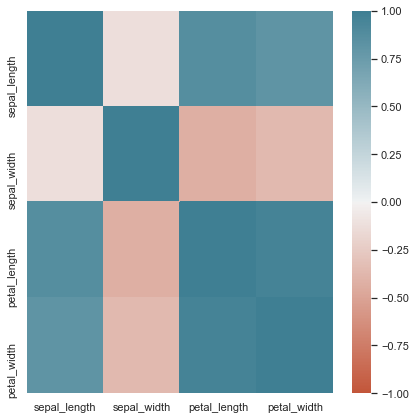

In [69]:
fig, ax = plt.subplots(figsize = (6,6))
ax = sns.heatmap(df3.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), ax=ax)
plt.tight_layout()
plt.show()

In [70]:
a = [11,12,22,11]
b = [7,8,9,10]
c = [10,11,22,23]
arr = np.array([a,b,c])

In [71]:
#calculating the covariance
cov_matrix = np.cov(arr, bias = True)

In [72]:
print(cov_matrix)

[[21.5   1.25 13.75]
 [ 1.25  1.25  6.25]
 [13.75  6.25 36.25]]


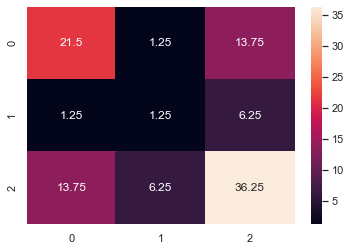

In [73]:
sns.heatmap(cov_matrix, annot = True, fmt='g')
plt.show()

4 - DISTRIBUTIONS

In [74]:
df.skew()

<ipython-input-74-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


rating   -0.23507
dtype: float64

In [76]:
df.kurtosis()

<ipython-input-76-c7edf97eb14c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


rating   -1.570351
dtype: float64

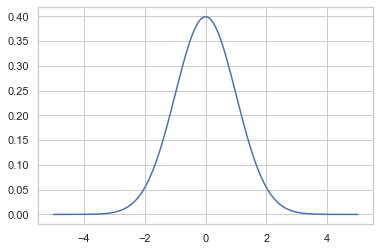

In [79]:
norm1 = np.arange(-5,5,0.001)
mean = 0.0
std = 1.0
pdf = stats.norm.pdf(norm1, mean, std)
plt.plot(norm1, pdf)
plt.show()

((array([-2.60376328, -2.283875  , -2.1005573 , -1.96875864, -1.86428437,
         -1.77691182, -1.70131573, -1.63435332, -1.57400778, -1.51890417,
         -1.46806125, -1.42075308, -1.37642684, -1.33465133, -1.29508341,
         -1.25744533, -1.22150891, -1.18708433, -1.15401181, -1.12215558,
         -1.0913992 , -1.06164202, -1.03279638, -1.00478546, -0.97754152,
         -0.95100448, -0.92512081, -0.89984257, -0.87512664, -0.85093408,
         -0.8272296 , -0.80398107, -0.78115919, -0.75873709, -0.73669013,
         -0.71499557, -0.69363244, -0.67258128, -0.65182406, -0.63134396,
         -0.61112532, -0.59115349, -0.57141472, -0.55189613, -0.53258558,
         -0.51347162, -0.49454346, -0.47579085, -0.45720409, -0.43877397,
         -0.4204917 , -0.40234892, -0.38433762, -0.36645016, -0.3486792 ,
         -0.33101768, -0.31345882, -0.29599609, -0.27862316, -0.26133393,
         -0.24412247, -0.22698303, -0.20991002, -0.19289797, -0.17594158,
         -0.15903562, -0.142175  , -0.

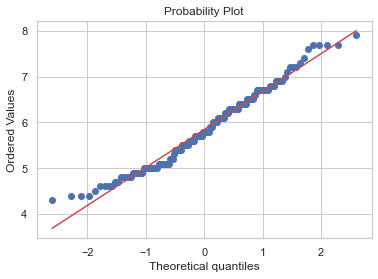

In [80]:
import pylab
stats.probplot(df3.sepal_length, plot=pylab)

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

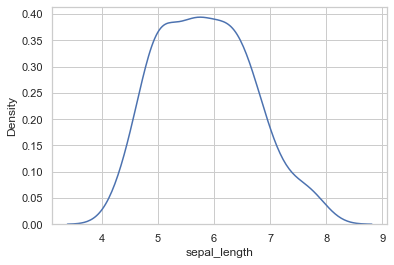

In [81]:
sns.kdeplot(df3.sepal_length)

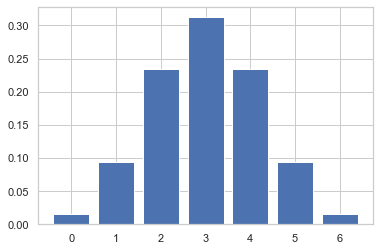

In [82]:
from scipy.stats import binom

n = 6
p = 0.5
r_value = list(range(n+1))
dist = [binom.pmf(r, n, p) for r in r_value]
plt.bar(r_value, dist)
plt.show()

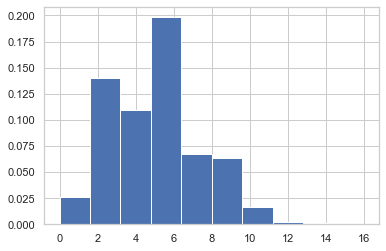

In [83]:
s = np.random.poisson(5, 10000)
count, bins, ignored = plt.hist(s, 10, density = True)
plt.show()

5 - CLT & CONFIDENCE INTERVAL

In [84]:
# Confidence Interval
import statsmodels.stats.api as sms
sms.DescrStatsW(df3.sepal_length).tconfint_mean()

(5.709732481507366, 5.976934185159301)

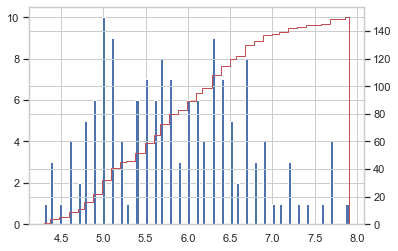

In [85]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
n, bins, patches = ax.hist(df3.sepal_length, bins=100)
n, bins, patches = ax2.hist(df3.sepal_length, cumulative = 1, histtype = 'step', bins=100, color = 'r')

(array([  9.,  32.,  46.,  73.,  89., 115., 133., 139., 144., 150.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 [<matplotlib.patches.Polygon at 0x2d6eb542520>])

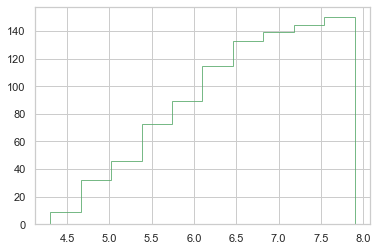

In [86]:
plt.hist(df3.sepal_length, cumulative = True, label = 'CDF', histtype = 'step', alpha = 0.8, color = 'g')

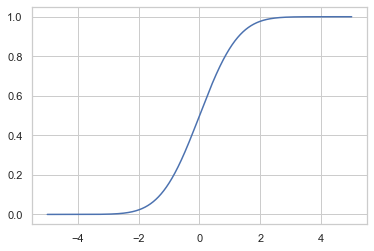

In [87]:
cdf = stats.norm.cdf(norm1)
plt.plot(norm1, cdf)
plt.show()

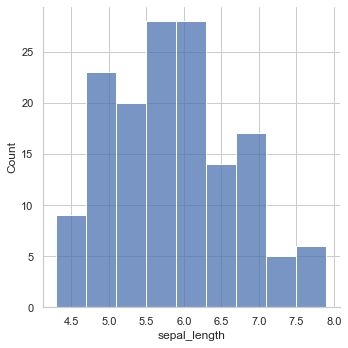

In [88]:
ax = sns.displot(df3.sepal_length)